#### Benjamin Sinko


## The inverse-square law and the stability of planetary orbits
The potential

$$
V(r)=-\alpha/r,
$$

where the quantity $r$ is the absolute value of the relative position
and $\alpha$ is a constant.


When we rewrote the equations of motion in polar coordinates, we found the
analytical solution to the radial equation of motion

$$
r(\phi) = \frac{c}{1+\epsilon\cos{(\phi)}},
$$

where $c=L^2/\mu\alpha$, with
the reduced mass $\mu$ and the angular momentum $L$, as
discussed during the lectures. With the transformation of a two-body
problem to the center-of-mass frame, the actual equations look like an
*effective* one-body problem. 

The quantity $\epsilon$ is what we called the eccentricity. Since we
will mainly study bounded orbits, we have $0 \le \epsilon < 1$.  For
the Earth, the orbit is indeed close to circular and at perihelion
(the closest distance to the Sun), the Earth's center is about 0.98329
astronomical units (AU) or 147,098,070 km from the Sun's center. For
Earth, the orbital eccentricity is $\epsilon\approx 0.0167$. The outer
planets have more elliptical orbits. For example, Mars has its
perihelion at 206,655,215 km and its apehelion at 249,232,432 km.

In this part we will limit ourselves to the Earth-Sun system we
studied in homeworks 5 and 6. You can reuse your code with either the
Velocity-Verlet or the Euler-Cromer algorithms from homework 5 or 6.

This means also that $\alpha=GM_{\odot}M_{\mathrm{Earth}}$. We will
use $\alpha$ as a shorthand in the equations here. Keep in mind that
in homework 5 you scaled $GM_{\odot}=4\pi^2$ in your code.

The exercises here are all based on you analyzing the results from your code from homeworks 5, 6, 7 and 8.

As a reminder, we list the equations we studied in homeworks 5 and 6.
Newton's law of gravitation is given by a force $F_G$ (we assume this
is the force acting on Earth from the Sun)

$$
F_G=-\frac{GM_{\odot}M_{\mathrm{Earth}}}{r^2},
$$

where $M_{\odot}$ is the mass of the Sun and $M_{\mathrm{Earth}}$ is
the mass of the Earth. The gravitational constant is $G$ and $r$ is
the distance between the Earth and the Sun.  We assumed that the Sun
has a mass which is much larger than that of the Earth. We could
therefore safely neglect the motion of the Sun.

In homeworks 5 and 6 we assumed that the orbit of the Earth around the Sun 
was co-planar, and we took this to be the $xy$-plane.
Using Newton's second law of motion we got the following equations

$$
\frac{d^2x}{dt^2}=-\frac{F_{G,x}}{M_{\mathrm{Earth}}},
$$

and

$$
\frac{d^2y}{dt^2}=-\frac{F_{G,y}}{M_{\mathrm{Earth}}},
$$

where $F_{G,x}$ and $F_{G,y}$ are the $x$ and $y$ components of the
gravitational force.

You can obviously set $\alpha=GM_{\odot}M_{\mathrm{Earth}}$ as we did in homeworks 5 and 6.





* 1a (10pt) Use now your code from homework 5 (in cartesian coordinates). Start with a circular orbit (this corresponds to  setting $\epsilon=0$ for the equations in Polar coordinates), and plot $x$ versus $y$. How would you choose the initial conditions to obtain a circular orbit?  **Note** the your code will be run in Cartesian coordinates.



In [6]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
import math 

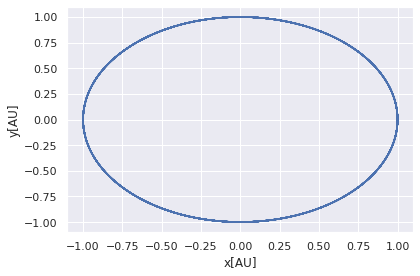

In [11]:
#Velocity-Verlet Method
newDeltaT = 0.001

tfinal = 10 # in years
n = ceil(tfinal/newDeltaT)
# Arrays for time t, velocity v, and position r
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))

# setting up the kinetic, potential and total energy, note only functions of time
EKinetic = np.zeros(n)
EPotential = np.zeros(n)
ETotal = np.zeros(n)

# Initial conditions to give a circular orbit
r0 = np.array([1.0,0.0]) 
v0 = np.array([0.0,2*pi])

r[0] = r0
v[0] = v0
Fourpi2 = 4*pi*pi

# Variables for energies
rabs0 = sqrt(sum(r[0]*r[0]))

#  Initial kinetic energy. 
# Note that we skip the mass of the Earth here
# that is MassEarth=1 in all codes
EKinetic[0] = 0.5*sum(v0*v0)

#  Initial potential energy 
EPotential[0] = -4*pi*pi/rabs0

#  Initial total energy 
ETotal[0] = EPotential[0]+EKinetic[0]

# Integrating using Euler's method
for i in range(n-1):
    #accelerationn
    rabs = sqrt(sum(r[i]*r[i]))
    a = -Fourpi2*r[i]/(rabs**3)
    # update velocity, time and position using Euler's forward method
    r[i+1] = r[i] + newDeltaT*v[i] + ((newDeltaT**2)/2)*(a)
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    agh_a = -4*(pi**2)*r[i+1]/(rabs**3)
    v[i+1] = v[i] + newDeltaT*(0.5)*(a + agh_a)
    t[i+1] = t[i] + newDeltaT
    
    EKinetic[i+1] = 0.5*sum(v[i+1]*v[i+1])
    EPotential[i+1] = -4*pi*pi/sqrt(sum(r[i+1]*r[i+1]))
    ETotal[i+1] = EPotential[i+1]+EKinetic[i+1]

#plotting
fig, ax = plt.subplots()
ax.set_xlabel('x[AU]')
ax.set_ylabel('y[AU]')
ax.plot(r[:,0], r[:,1])
fig.tight_layout()
plt.show()

* Checking that for the case of a circular orbit that both the kinetic and the potential energies are conserved.

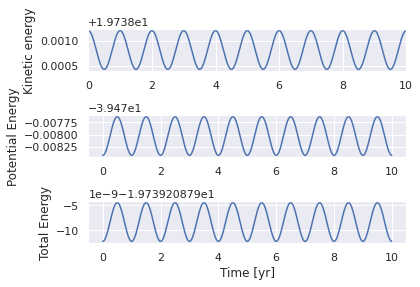

In [12]:
fig, axs = plt.subplots(3, 1)
axs[0].plot(t, EKinetic)
axs[0].set_xlim(0, tfinal)
axs[0].set_ylabel('Kinetic energy')
axs[1].plot(t, EPotential)
axs[1].set_ylabel('Potential Energy')
axs[2].plot(t, ETotal)
axs[2].set_xlabel('Time [yr]')
axs[2].set_ylabel('Total Energy')
fig.tight_layout()

plt.show()

* With the same initial conditions (circular orbit) use Kepler's second law (see Taylor section 3.4) to show that angular momentum is conserved. Compare the value you get with the angular momentum you get from a circular orbit. 


In [13]:
def AreaCalc(rad1,rad2):
    rad1n = np.linalg.norm(rad1)
    rad2n = np.linalg.norm(rad2)
    theta1 = math.atan(abs(rad1[1]/rad1[0]))
    theta2 = math.atan(abs(rad2[1]/rad2[0]))
    radn = 0.5*(rad1n+rad2n)
    delta_theta = np.abs(theta1 - theta2)
    return 0.5*delta_theta*radn**2

def AngMomentum(rad,vel):
    radn = np.linalg.norm(rad)
    veln = np.linalg.norm(vel)
    rad = rad/radn
    vel = vel/veln
    dotprod = rad[0]*vel[0]+rad[1]*vel[1]
    theta = math.acos(dotprod)
    return radn*veln*np.sin(theta)

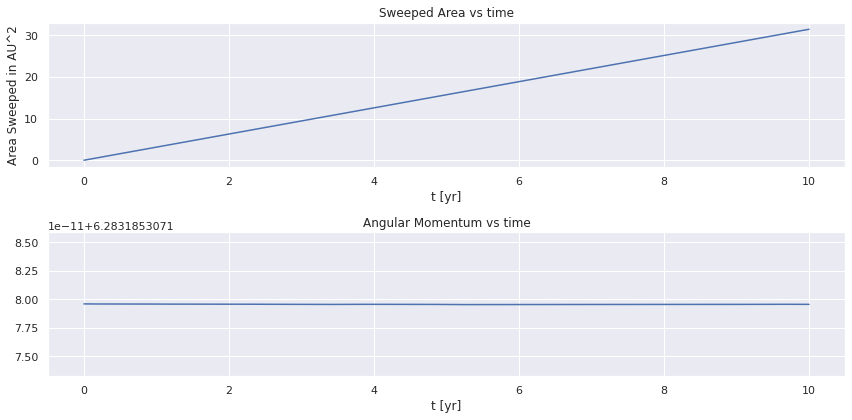

In [14]:
AreaVal = np.zeros(len(t))
AreaVal[0] = 0
AngMo = np.zeros(len(t))  
AngMo[0] = AngMomentum(r[0,:],v[0,:])
for i in range(0,len(t)-1):
    AreaVal[i+1] = AreaVal[i] + AreaCalc(r[i,:],r[i+1,:])
    AngMo[i+1] = AngMomentum(r[i+1,:],v[i+1,:])

fig, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(t,AreaVal,label='Area')
ax[0].set_title('Sweeped Area vs time')
ax[0].set_xlabel('t [yr]')
ax[0].set_ylabel('Area Sweeped in AU^2')

ax[1].plot(t,AngMo,label='Angular Momentum')
ax[1].set_title('Angular Momentum vs time')
ax[1].set_xlabel('t [yr]')
plt.tight_layout()

* Until now we have assumed that we have an inverse-square force $F(r) = -\alpha/r^2$. Let us rewrite this force as $F(r) =-\alpha/r^{\beta}$ with $\beta=[2,2.01,2.10,2.5,3.0,3.5]$. **Note**: in the code we are setting the force in say for example the $x$-direction (the same applies to the $y$- and/or eventual $z$-directions) to $F(r) = -(\alpha/r^3)x$. It means that when you study the dependence on the parameter $\beta$, you need to add $1$ to the power. 

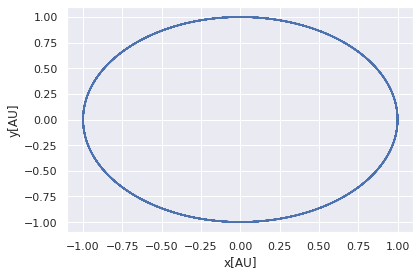

In [31]:
#Velocity-Verlet Method
newDeltaT = 0.001

tfinal = 10 # in years
n = ceil(tfinal/newDeltaT)
# Arrays for time t, velocity v, and position r
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))

# Initial conditions to give a circular orbit
r0 = np.array([1.0,0.0]) 
v0 = np.array([0.0,2*pi])

r[0] = r0
v[0] = v0
Fourpi2 = 4*pi*pi

# Variables for energies
rabs0 = sqrt(sum(r[0]*r[0]))

#testing different values of beta to see dependency
B = 3.5

# Integrating using Euler's method
for i in range(n-1):
    #accelerationn
    rabs = sqrt(sum(r[i]*r[i]))
    a = -Fourpi2*r[i]/(rabs**B)
    # update velocity, time and position using Euler's forward method
    r[i+1] = r[i] + newDeltaT*v[i] + ((newDeltaT**2)/2)*(a)
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    agh_a = -4*(pi**2)*r[i+1]/(rabs**B)
    v[i+1] = v[i] + newDeltaT*(0.5)*(a + agh_a)
    t[i+1] = t[i] + newDeltaT

#plotting
fig, ax = plt.subplots()
ax.set_xlabel('x[AU]')
ax.set_ylabel('y[AU]')
ax.plot(r[:,0], r[:,1])
fig.tight_layout()
plt.show()

* Considering now an elliptical orbit with an initial position 1 AU from the Sun and an initial  velocity of 5 AU/yr. We show that the total energy is a constant (the kinetic and potential energies will vary). Showing also that the angular momentum is a constant. If you change the parameter $\beta$ in $F(r) = -\alpha/r^{\beta}$ from $\beta=2$ to $\beta=3$, these quantities conserved! 

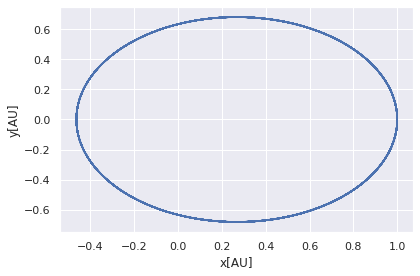

In [45]:
#Velocity-Verlet Method
newDeltaT = 0.001

tfinal = 10 # in years
n = ceil(tfinal/newDeltaT)
# Arrays for time t, velocity v, and position r
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))

# setting up the kinetic, potential and total energy, note only functions of time
EKinetic = np.zeros(n)
EPotential = np.zeros(n)
ETotal = np.zeros(n)

# Initial conditions to give a circular orbit
r0 = np.array([1.0,0.0]) 
v0 = np.array([0.0,5.0])

r[0] = r0
v[0] = v0
Fourpi2 = 4*pi*pi

# Variables for energies
rabs0 = sqrt(sum(r[0]*r[0]))

# Initial kinetic energy. 
# Note that we skip the mass of the Earth here
# that is MassEarth=1 in all codes
EKinetic[0] = 0.5*sum(v0*v0)

#  Initial potential energy 
EPotential[0] = -4*pi*pi/rabs0

#  Initial total energy 
ETotal[0] = EPotential[0]+EKinetic[0]

# Integrating using Euler's method
for i in range(n-1):
    #accelerationn
    rabs = sqrt(sum(r[i]*r[i]))
    a = -Fourpi2*r[i]/(rabs**3)
    # update velocity, time and position using Euler's forward method
    r[i+1] = r[i] + newDeltaT*v[i] + ((newDeltaT**2)/2)*(a)
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    agh_a = -4*(pi**2)*r[i+1]/(rabs**3)
    v[i+1] = v[i] + newDeltaT*(0.5)*(a + agh_a)
    t[i+1] = t[i] + newDeltaT
    
    EKinetic[i+1] = 0.5*sum(v[i+1]*v[i+1])
    EPotential[i+1] = -4*pi*pi/sqrt(sum(r[i+1]*r[i+1]))
    ETotal[i+1] = EPotential[i+1]+EKinetic[i+1]

#plotting
fig, ax = plt.subplots()
ax.set_xlabel('x[AU]')
ax.set_ylabel('y[AU]')
ax.plot(r[:,0], r[:,1])
fig.tight_layout()
plt.show()

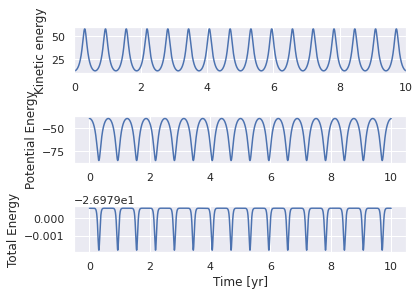

In [43]:
fig, axs = plt.subplots(3, 1)
axs[0].plot(t, EKinetic)
axs[0].set_xlim(0, tfinal)
axs[0].set_ylabel('Kinetic energy')
axs[1].plot(t, EPotential)
axs[1].set_ylabel('Potential Energy')
axs[2].plot(t, ETotal)
axs[2].set_xlabel('Time [yr]')
axs[2].set_ylabel('Total Energy')
fig.tight_layout()

plt.show()

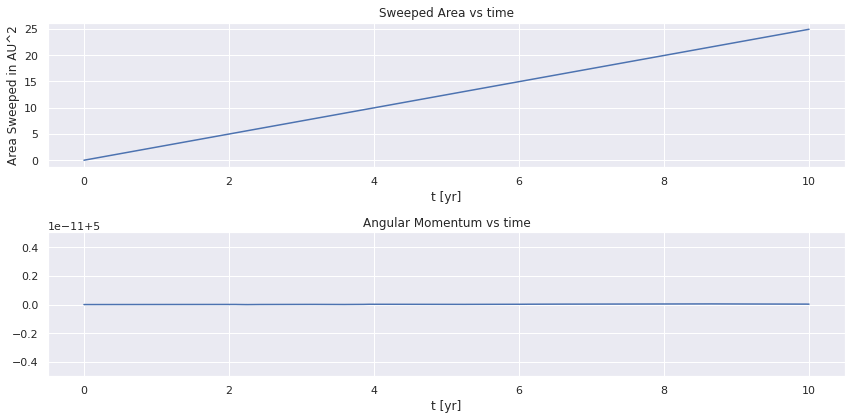

In [44]:
AreaVal = np.zeros(len(t))
AreaVal[0] = 0
AngMo = np.zeros(len(t))  
AngMo[0] = AngMomentum(r[0,:],v[0,:])
for i in range(0,len(t)-1):
    AreaVal[i+1] = AreaVal[i] + AreaCalc(r[i,:],r[i+1,:])
    AngMo[i+1] = AngMomentum(r[i+1,:],v[i+1,:])

fig, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(t,AreaVal,label='Area')
ax[0].set_title('Sweeped Area vs time')
ax[0].set_xlabel('t [yr]')
ax[0].set_ylabel('Area Sweeped in AU^2')

ax[1].plot(t,AngMo,label='Angular Momentum')
ax[1].set_title('Angular Momentum vs time')
ax[1].set_xlabel('t [yr]')
plt.tight_layout()

### Making a program for the solar system

Our final aim is to write a code which includes the known planets of the solar system. 

We will, as before, use so-called astronomical units when rewriting our equations. 
Using astronomical units (AU as abbreviation)it means that 
one astronomical unit of length, known as 1 AU, is the average distance between the Sun and Earth, that is
$1$ AU = $1.5\times 10^{11}$ m.  It can also be convenient to use years instead of seconds since years match
better the time evolution of the solar system. The mass of the Sun is $M_{\mathrm{sun}}=M_{\odot}=2\times 10^{30}$ kg. The masses of all relevant planets and their distances from the sun are listed in the table here in kg and AU.

<table border="1">
<thead>
<tr><th align="center"> Planet</th> <th align="center">                 Mass in kg                </th> <th align="center">Distance to  sun in AU</th> </tr>
</thead>
<tbody>
<tr><td align="center">   Earth      </td> <td align="center">   $M_{\mathrm{Earth}}=6\times 10^{24}$ kg        </td> <td align="center">   1AU                       </td> </tr>
<tr><td align="center">   Jupiter    </td> <td align="center">   $M_{\mathrm{Jupiter}}=1.9\times 10^{27}$ kg    </td> <td align="center">   5.20 AU                   </td> </tr>
<tr><td align="center">   Mars       </td> <td align="center">   $M_{\mathrm{Mars}}=6.6\times 10^{23}$ kg       </td> <td align="center">   1.52 AU                   </td> </tr>
<tr><td align="center">   Venus      </td> <td align="center">   $M_{\mathrm{Venus}}=4.9\times 10^{24}$ kg      </td> <td align="center">   0.72 AU                   </td> </tr>
<tr><td align="center">   Saturn     </td> <td align="center">   $M_{\mathrm{Saturn}}=5.5\times 10^{26}$ kg     </td> <td align="center">   9.54 AU                   </td> </tr>
<tr><td align="center">   Mercury    </td> <td align="center">   $M_{\mathrm{Mercury}}=3.3\times 10^{23}$ kg    </td> <td align="center">   0.39 AU                   </td> </tr>
<tr><td align="center">   Uranus     </td> <td align="center">   $M_{\mathrm{Uranus}}=8.8\times 10^{25}$ kg     </td> <td align="center">   19.19 AU                  </td> </tr>
<tr><td align="center">   Neptun     </td> <td align="center">   $M_{\mathrm{Neptun}}=1.03\times 10^{26}$ kg    </td> <td align="center">   30.06 AU                  </td> </tr>
<tr><td align="center">   Pluto      </td> <td align="center">   $M_{\mathrm{Pluto}}=1.31\times 10^{22}$ kg     </td> <td align="center">   39.53 AU                  </td> </tr>
</tbody>
</table>
Pluto is no longer considered a planet, but we add it here for
historical reasons. It is optional in this midterm project to include
Pluto and eventual moons.

In setting up the equations we can limit ourselves to a co-planar
motion and use only the $x$ and $y$ coordinates. But you should feel
free to extend your equations to three dimensions, it is not very
difficult and the data from NASA are all in three dimensions.
You find these data at the 
[NASA](http://www.nasa.gov/index.html) has an excellent site at <http://ssd.jpl.nasa.gov/horizons.cgi#top> site.

From there you can extract initial conditions in order to start your
differential equation solver.  At the above website you need to change
from **OBSERVER** to **VECTOR** and then write in the planet you are
interested in.  The generated data contain the $x$, $y$ and $z$ values
as well as their corresponding velocities. The velocities are in units
of AU per day.  Alternatively they can be obtained in terms of km and
km/s.

We will start with  the three-body problem, still with the Sun kept
fixed as the center of mass of the system but including Jupiter (the
most massive planet in the solar system, having a mass that is
approximately 1000 times smaller than that of the Sun) together with
the Earth. This leads to a three-body problem. Without Jupiter, the
Earth's motion is stable and unchanging with time. The aim here is to
find out first how much Jupiter alters the Earth's motion.


This force is given again by

$$
F_{\mathrm{Earth-Jupiter}}=-\frac{GM_{\mathrm{Jupiter}}M_{\mathrm{Earth}}}{r_{\mathrm{Earth-Jupiter}}^2},
$$

where $M_{\mathrm{Jupiter}}$ is the mass of Jupyter and
$M_{\mathrm{Earth}}$ is the mass of the Earth.  The gravitational constant
is $G$ and $r_{\mathrm{Earth-Jupiter}}$ is the distance between Earth
and Jupiter.

We assume again that the orbits of the two planets are co-planar, and
we take this to be the $xy$-plane (you can easily extend the equations
to three dimensions, feel free to run your calculations in two or three dimensions).

* 2a (20pt) Modify your coupled first-order differential equations from homework 5 in order to accomodate both the motion of the Earth and Jupiter by taking into account the distance in $x$ and $y$ between the Earth and Jupiter. Write out the differential equations for  Earth and Jupyter, keeping the Sun at rest (mass center of the system). Scale these equations in terms of Astronomical Units.

* 2b (10pt) Use either the Euler-Cromer or Velocity-Verlet algorithms to compute the positions of the Earth and Jupiter. Repeat the calculations by increasing the mass of Jupiter by a factor of 10, 100 and 1000 and plot the position of the Earth.  Discuss your results and study the stability of this three-body system as function of the chosen

masses for Jupiter.

* 2c (20pt) Since the Sun is much more massive than all the other planets, we will define the Sun as our center of mass and set its velocity and position to zero.  Our final task is to add the remaining known planets and simulate the solar system asfunction of time. Add gradually one planet at the time. Develop a code which simulates the solar system with the above planets and plot their orbits. Discuss your results.